In [ ]:
import pandas as pd
df=pd.read_csv("/content/archive (1).zip")
print(df)

         Id Genetics Hormonal Changes     Medical Conditions  \
0    133992      Yes               No                No Data   
1    148393       No               No                 Eczema   
2    155074       No               No             Dermatosis   
3    118261      Yes              Yes               Ringworm   
4    111915       No               No              Psoriasis   
..      ...      ...              ...                    ...   
994  184367      Yes               No  Seborrheic Dermatitis   
995  164777      Yes              Yes                No Data   
996  143273       No              Yes  Androgenetic Alopecia   
997  169123       No              Yes             Dermatitis   
998  127183      Yes              Yes              Psoriasis   

      Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                      No Data      Magnesium deficiency  Moderate   19   
1                  Antibiotics      Magnesium deficiency      High   43   
2     

In [ ]:
df.isnull().sum()

,0
Id,0
Genetics,0
Hormonal Changes,0
Medical Conditions,0
Medications & Treatments,0
Nutritional Deficiencies,0
Stress,0
Age,0
Poor Hair Care Habits,0
Environmental Factors,0


In [ ]:
df.replace("No Data", "Unknown", inplace=True)

In [ ]:
df.columns = df.columns.str.strip()

binary_cols = [
    'Genetics', 'Hormonal Changes', 'Poor Hair Care Habits',
    'Environmental Factors', 'Smoking', 'Weight Loss'
]


existing_binary_cols = [col for col in binary_cols if col in df.columns]

for col in existing_binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    'Medical Conditions',
    'Medications & Treatments',
    'Nutritional Deficiencies',
    'Stress'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.drop('Id', axis=1, inplace=True)

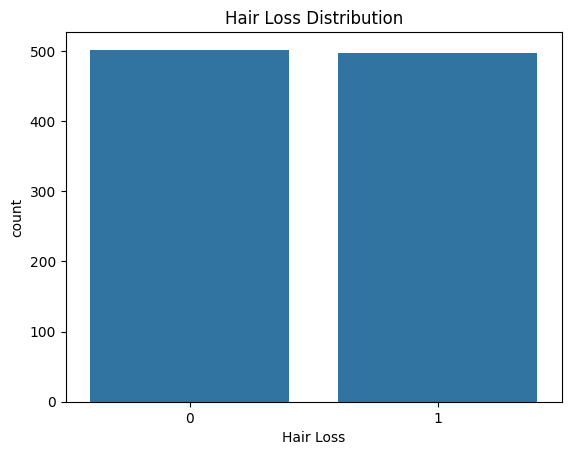

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Hair Loss', data=df)
plt.title("Hair Loss Distribution")
plt.show()

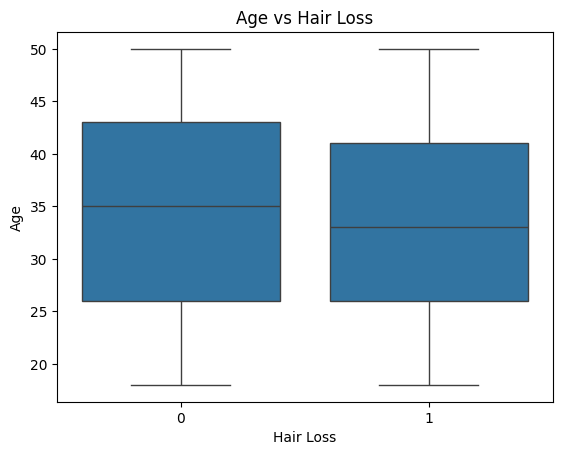

In [ ]:
sns.boxplot(x='Hair Loss', y='Age', data=df)
plt.title("Age vs Hair Loss")
plt.show()

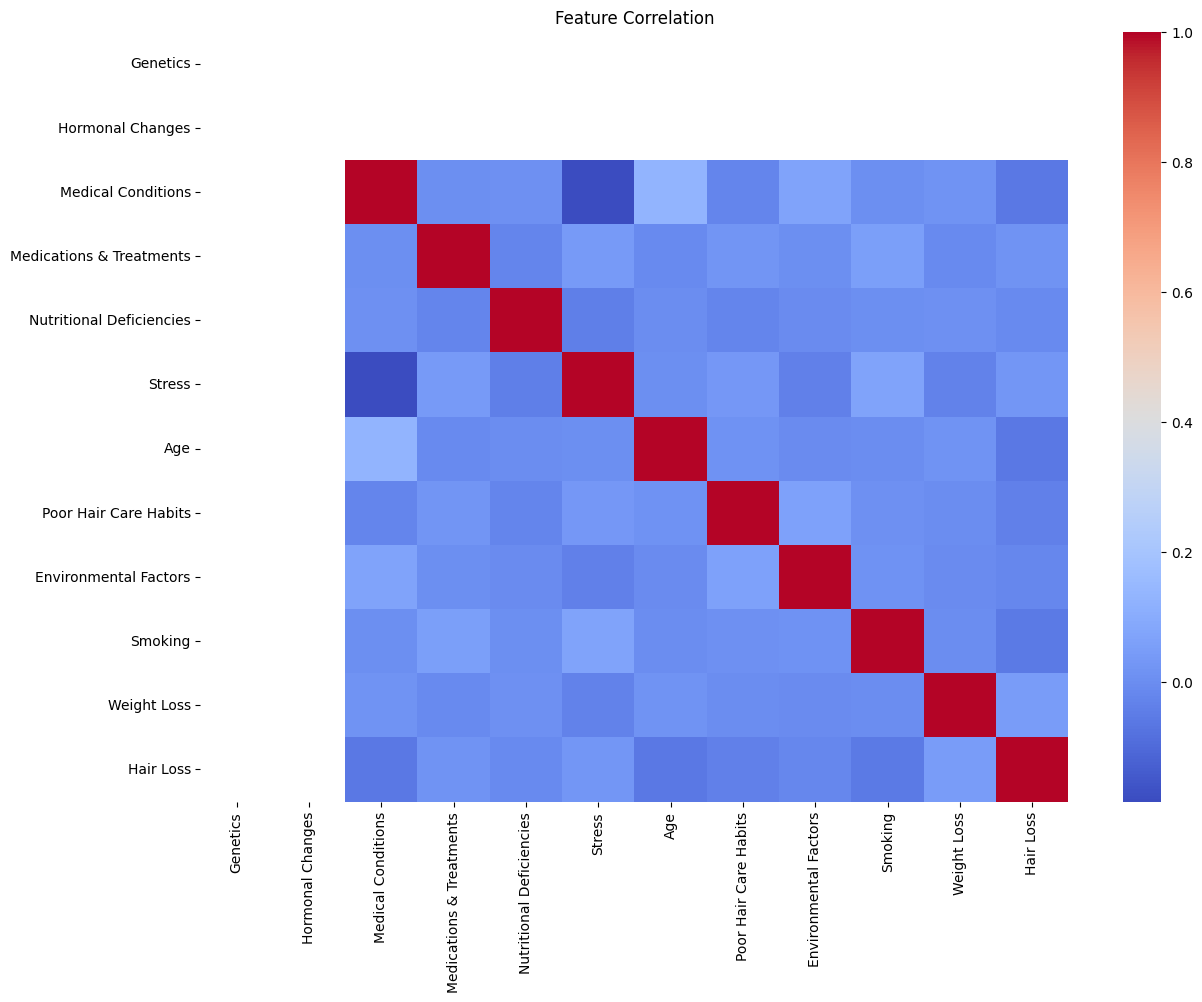

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = df.drop('Hair Loss', axis=1)
y = df['Hair Loss']

# Impute NaN values in X using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace NaN with the mean of the column
X_imputed = imputer.fit_transform(X) # X_imputed will be a numpy array

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
print(df['Hair Loss'].unique())

[0 1]


In [ ]:
df['Hair Loss'] = df['Hair Loss'].map({'Yes': 1, 'No': 0})

In [ ]:
print(df['Hair Loss'].unique())

[nan]


In [ ]:
X = df.drop('Hair Loss', axis=1)
y = df['Hair Loss']

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Ensure df is in a clean state if you've been experimenting
# If you run this block, ensure you run cells above it that load the initial df

# --- Preprocessing Steps ---
# Replace 'No Data' values
df.replace("No Data", "Unknown", inplace=True)

# Strip column names of whitespace
df.columns = df.columns.str.strip()

# Binary encoding for 'Yes'/'No' columns
binary_cols = [
    'Genetics', 'Hormonal Changes', 'Poor Hair Care Habits',
    'Environmental Factors', 'Smoking', 'Weight Loss'
]

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Label Encoding for other categorical columns
categorical_cols = [
    'Medical Conditions',
    'Medications & Treatments',
    'Nutritional Deficiencies',
    'Stress'
]

le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Drop 'Id' column
df.drop('Id', axis=1, inplace=True)

# --- Define X and y (now that df is fully numeric) ---
X = df.drop('Hair Loss', axis=1)
# 'Hair Loss' is already 0/1, so no need for .map()
y = df['Hair Loss']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute NaN values in X (if any remain after preprocessing)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
print(df['Hair Loss'].isna().sum())

999


In [ ]:
df = df.dropna(subset=['Hair Loss'])

In [ ]:
df['Hair Loss'] = df['Hair Loss'].map({'Yes': 1, 'No': 0})

In [ ]:
print(df['Hair Loss'].isna().sum())

0


In [ ]:
X = df.drop('Hair Loss', axis=1)
y = df['Hair Loss']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(df['Hair Loss'].unique())


[]


In [ ]:
df['Hair Loss'] = (
    df['Hair Loss']
    .astype(str)        # convert to string
    .str.strip()        # remove spaces
    .str.lower()        # make lowercase
)

In [ ]:
print(df['Hair Loss'].unique())

[]


In [ ]:
df['Hair Loss'] = df['Hair Loss'].map({'yes': 1, 'no': 0})

In [ ]:
print(df.shape)
print(df['Hair Loss'].isna().sum())

(0, 12)
0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 1. Reload the original DataFrame to ensure a clean state
df = pd.read_csv("/content/archive (1).zip")

# 2. Handle 'No Data' values (assuming this is still desired)
df.replace("No Data", "Unknown", inplace=True)

# 3. Strip column names of whitespace
df.columns = df.columns.str.strip()

# 4. Binary encoding for 'Yes'/'No' columns
binary_cols = [
    'Genetics', 'Hormonal Changes', 'Poor Hair Care Habits',
    'Environmental Factors', 'Smoking', 'Weight Loss'
]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# 5. Label Encoding for other categorical columns
categorical_cols = [
    'Medical Conditions',
    'Medications & Treatments',
    'Nutritional Deficiencies',
    'Stress'
]
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns and df[col].dtype == 'object': # Check if column is still object type
        df[col] = le.fit_transform(df[col])

# 6. Drop 'Id' column
df.drop('Id', axis=1, inplace=True)

# 7. Define X and y
X = df.drop('Hair Loss', axis=1)
y = df['Hair Loss'] # 'Hair Loss' should now be clean (0s and 1s)

# 8. Impute NaN values in X (if any remain after preprocessing)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 9. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 10. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Data preprocessing and splitting complete.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

Data preprocessing and splitting complete.
X_train shape: (799, 11)
y_train shape: (799,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


--- Model Evaluation ---
Accuracy: 0.505

Confusion Matrix:
 [[64 25]
 [74 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.72      0.56        89
           1       0.60      0.33      0.43       111

    accuracy                           0.51       200
   macro avg       0.53      0.53      0.50       200
weighted avg       0.54      0.51      0.49       200

